In [18]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

### Calibration

Two sepatate calibrations, as experiment was done over long period of time

[2.1003000692997498, -1583.8396789538274]


<IPython.core.display.Javascript object>


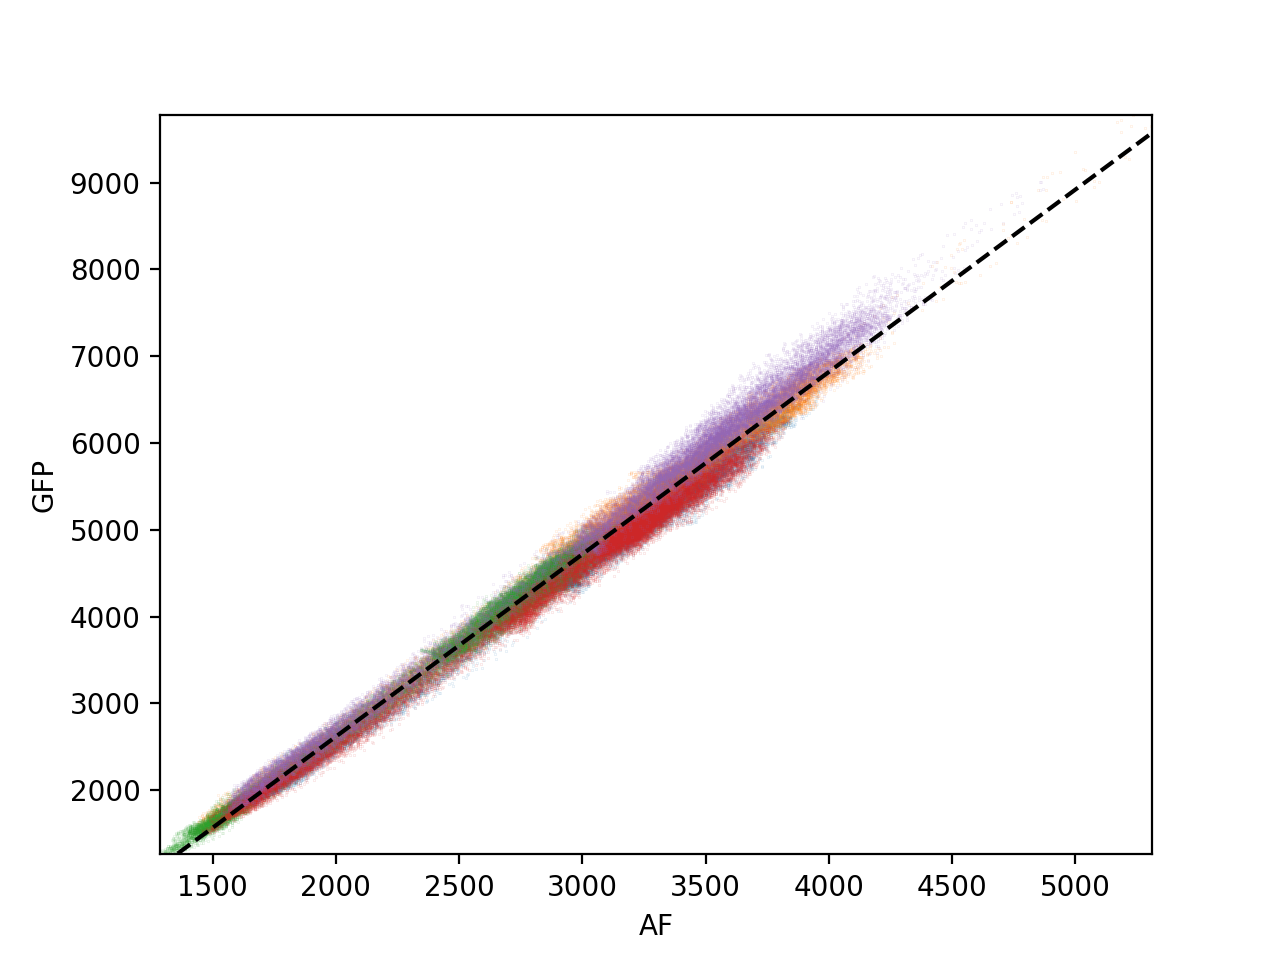

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='AF', ylabel='GFP'>)

In [20]:
n2_path = '/Users/blandt/Desktop/PH RING/Experiment 1 mos/N2/201111_n2_wt_tom4,15,60,eb,20beads'
af = AfCorrelation(direcslist(n2_path, 0), sigma=2, expand=10)
af.run()
print(af.params)
af.plot_correlation()

[2.04530625980172, -1416.9457374571712]


<IPython.core.display.Javascript object>


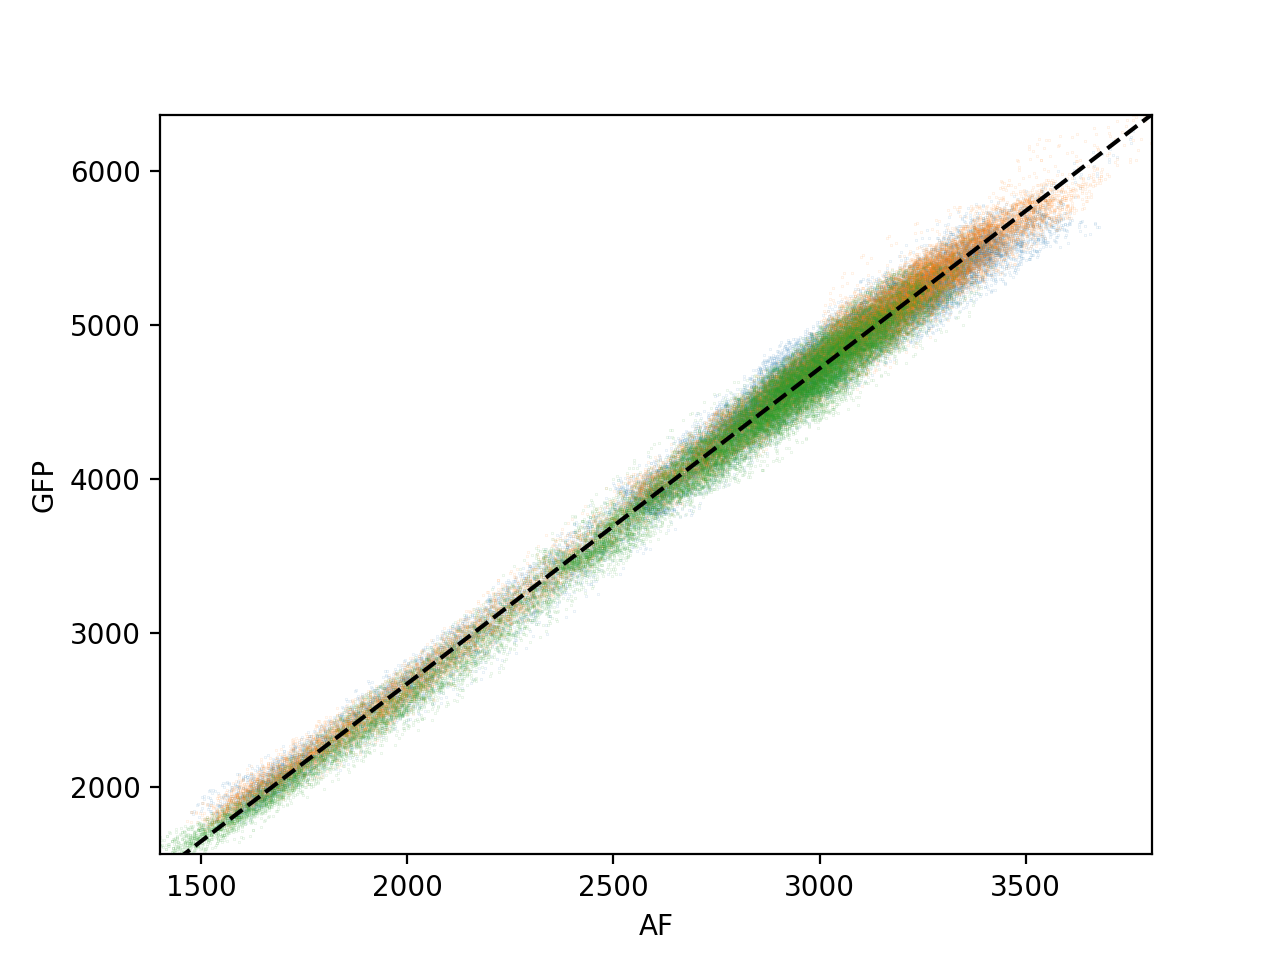

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:xlabel='AF', ylabel='GFP'>)

In [21]:
n2_path = '/Users/blandt/Desktop/PH RING/Experiment 1 mos/N2/210722_n2_tom4,15,60'
af_b = AfCorrelation(direcslist(n2_path, 0), sigma=2, expand=10)
af_b.run()
print(af_b.params)
af_b.plot_correlation()

### Correction

In [22]:
path = '/Users/blandt/Desktop/PH RING/Experiment 1 mos/'
paths = direcslist(path, 2)

for d in paths:
    ch1 = load_image(glob.glob(d + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(d + '/*488 SP 630-75*')[0])
    img = af_subtraction(ch1, ch2, *af.params)
    save_img(img, d + '/af_corrected.tif')

In [23]:
path = ['/Users/blandt/Desktop/PH RING/Experiment 1 mos/Experiment/210701_nwg373_tom4,15,60', 
       '/Users/blandt/Desktop/PH RING/Experiment 1 mos/Experiment/210816_nwg373_tom4,15,60',
       '/Users/blandt/Desktop/PH RING/Experiment 1 mos/N2/210722_n2_tom4,15,60']

paths = direcslist(path, 0)

for d in paths:
    ch1 = load_image(glob.glob(d + '/*488 SP 535-50*')[0])
    ch2 = load_image(glob.glob(d + '/*488 SP 630-75*')[0])
    img = af_subtraction(ch1, ch2, *af_b.params)
    save_img(img, d + '/af_corrected.tif')